In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates

plt.style.use("seaborn")

# Prophet 모델 시각화

In [3]:
all_df = pd.read_csv("/Users/juyeonm1/Desktop/CAPSTONE/data/all_cities_month_temp_df.csv")
display(all_df)

,year,month,Monthly Anamoly,Monthly Unc.,city_num,DateTime
0,1819,7,23.127,1.964,0,1819-07-01
1,1819,8,NaN,NaN,0,1819-08-01
2,1819,9,20.360,1.764,0,1819-09-01
3,1819,10,12.881,2.030,0,1819-10-01
4,1819,11,4.459,2.194,0,1819-11-01
...,...,...,...,...,...,...
12059,2020,8,28.999,0.220,4,2020-08-01
12060,2020,9,28.836,0.278,4,2020-09-01
12061,2020,10,26.535,0.207,4,2020-10-01
12062,2020,11,27.341,0.290,4,2020-11-01


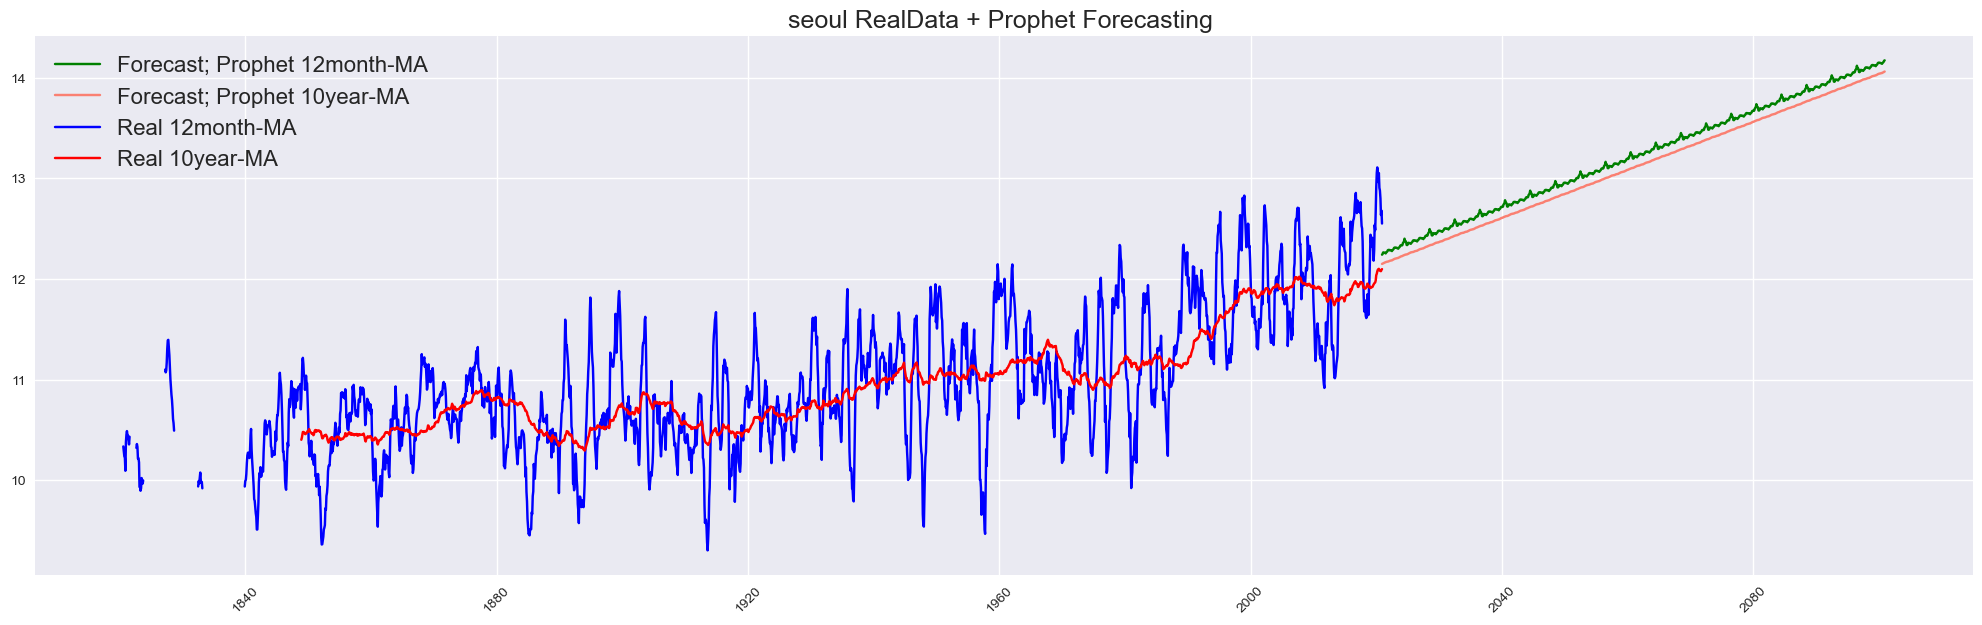

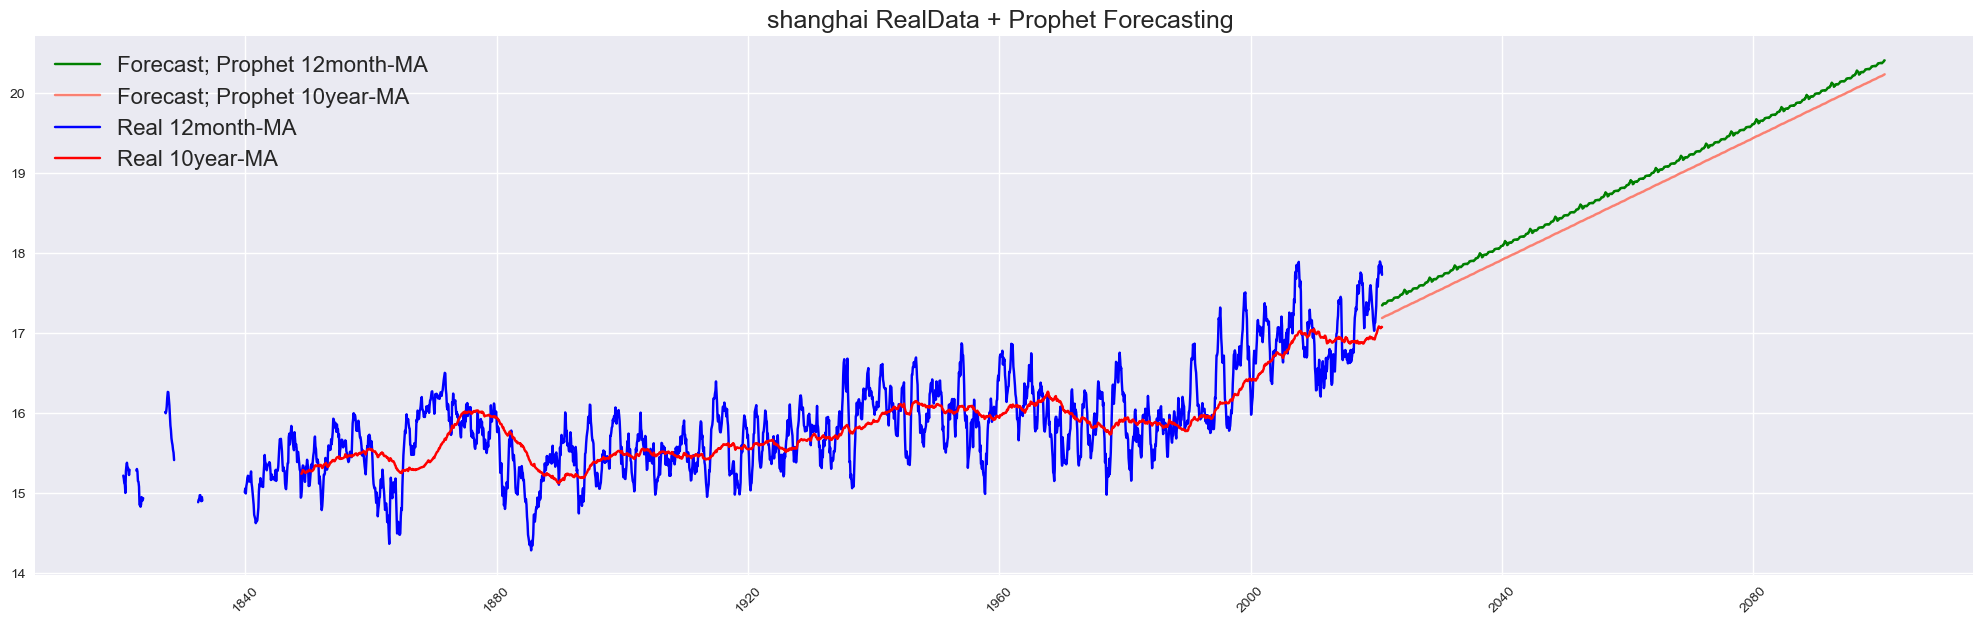

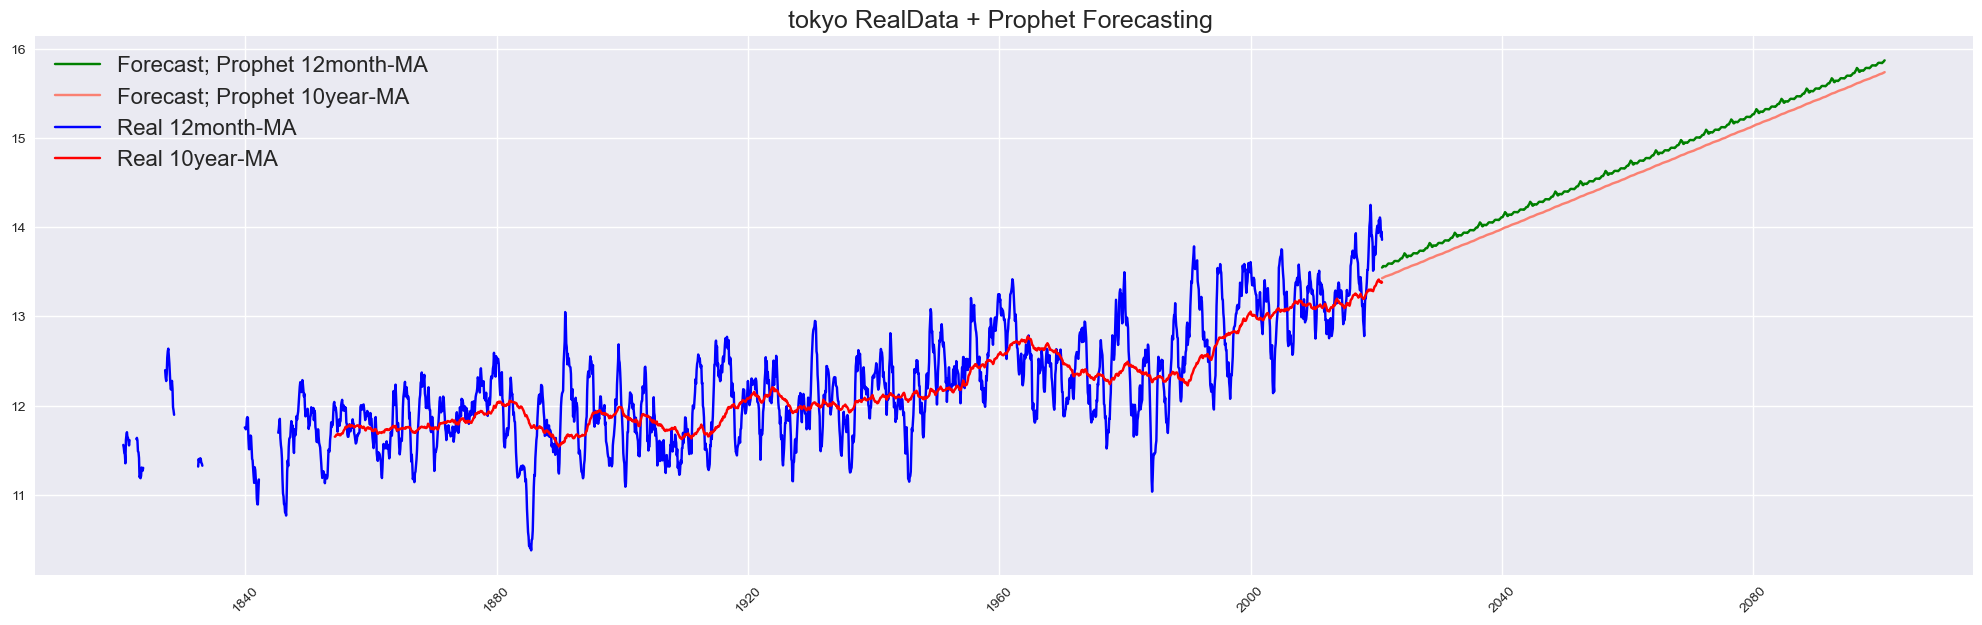

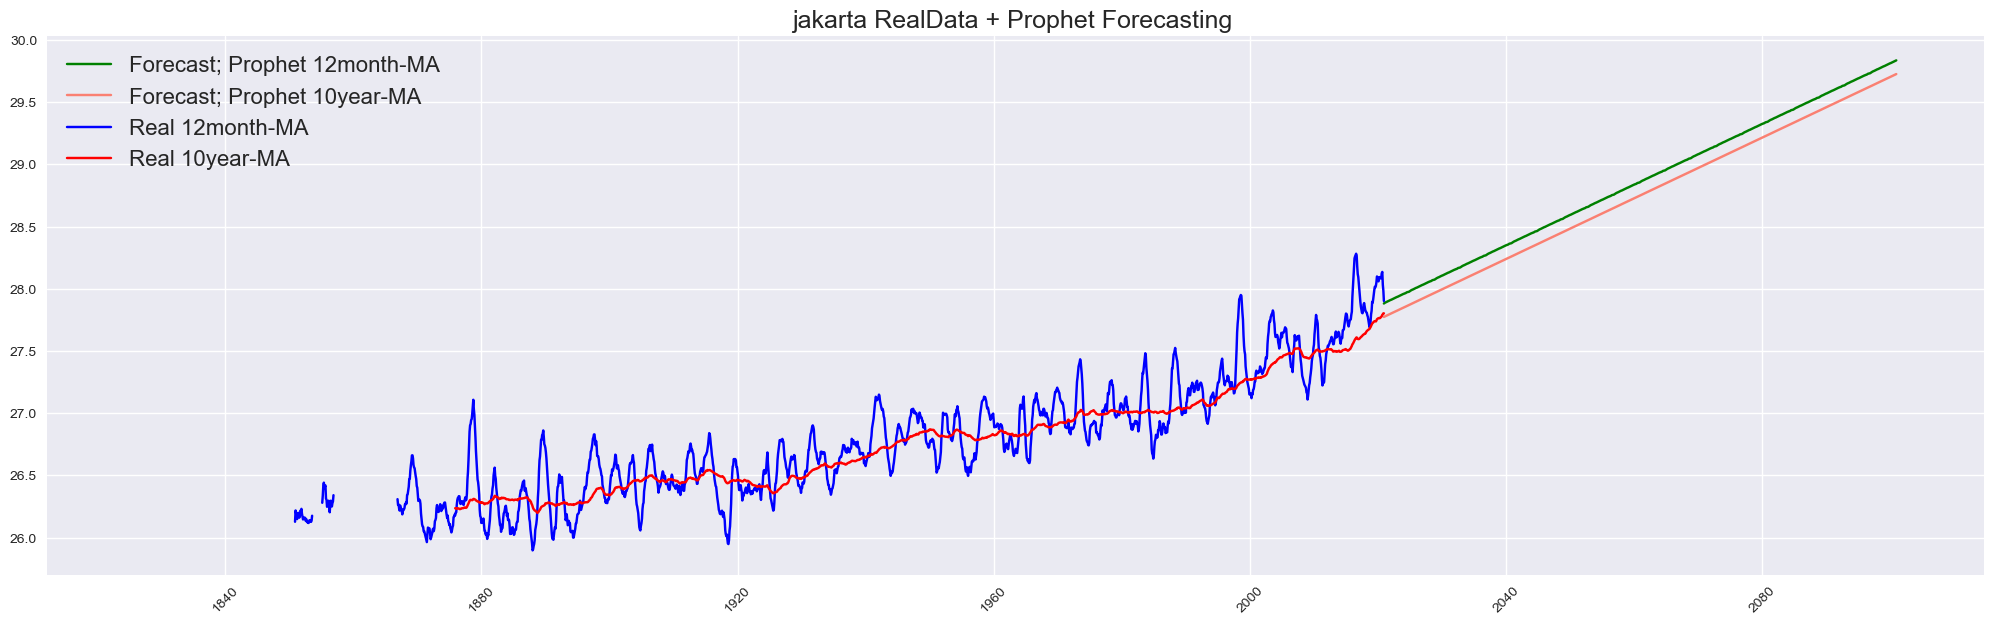

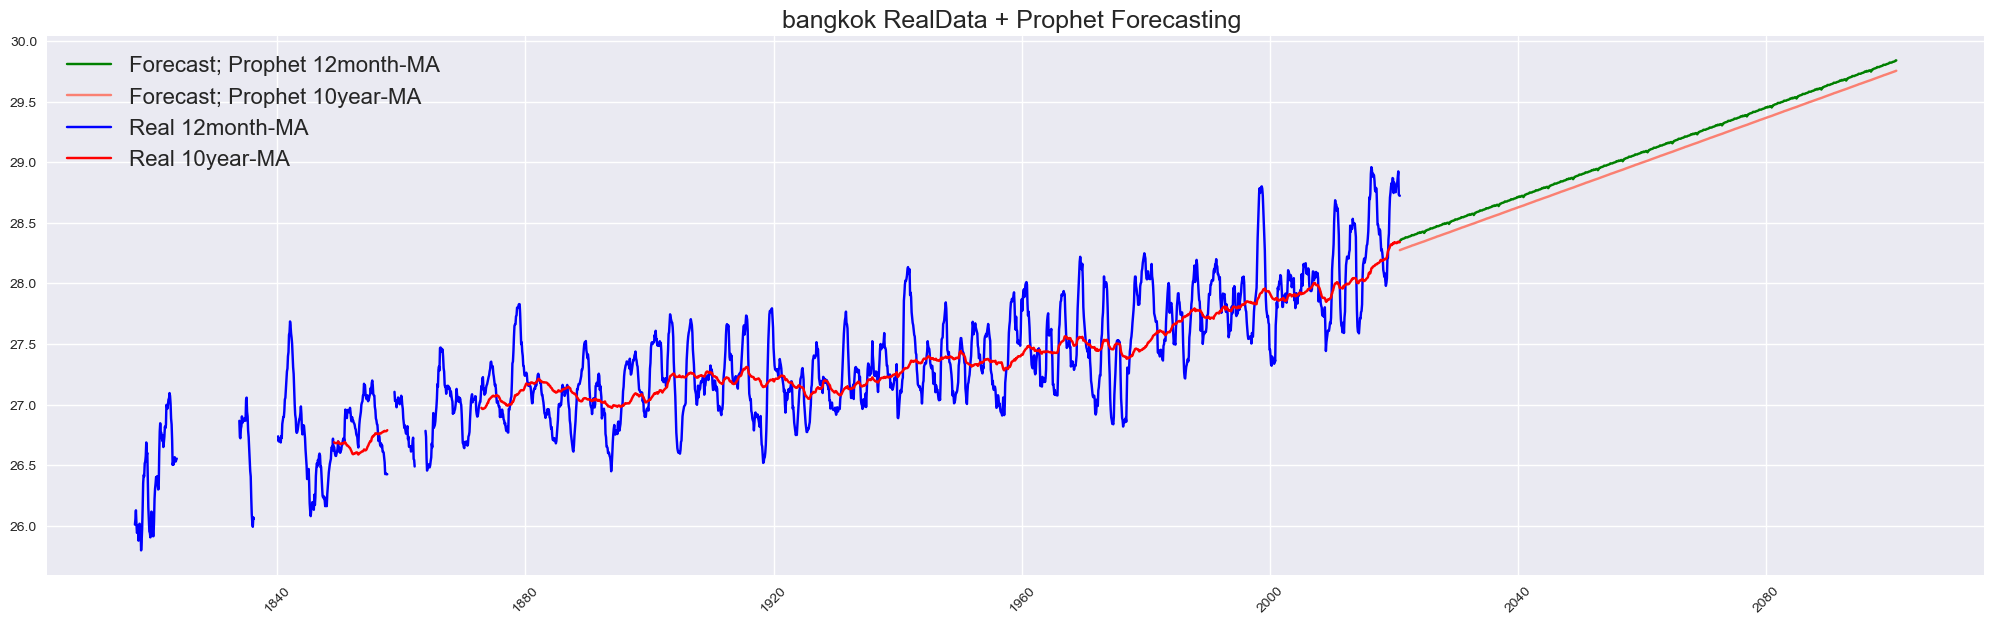

In [4]:
city_names = ['seoul', 'shanghai', 'tokyo', 'jakarta', 'bangkok']

for city in city_names:
    prophet_df = pd.read_csv(f"../PROPHET_model/prophet_forecast/prophet_forecast_{city}.csv")[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    prophet_df["ds"] = pd.to_datetime(prophet_df["ds"]).dt.to_period('M')

    prophet_month12_ma = prophet_df["yhat"].rolling(window=12).mean()
    prophet_year10_ma = prophet_df["yhat"].rolling(window=120).mean()

    x = pd.to_datetime(prophet_df.loc[:,"ds"].dt.year.astype('str')+'-'+prophet_df.loc[:,"ds"].dt.month.astype('str'))
    index_20201201 = prophet_df.loc[prophet_df.loc[:,'ds']=='2020-12-01'].index.values[0]

    plt.rcParams['figure.figsize'] = [20, 7]
    # plt.plot(x,prophet_month12_ma[:], label="12-month moving average")
    # plt.plot(x,prophet_year10_ma[:], color='red', label="10-year moving average")
    # plt.xticks(rotation=45)
    # plt.title(f"{city}'s Prophet Model Moving Average")
    # plt.legend()
    # plt.show()

    month_temp_df = all_df.loc[all_df.loc[:,"city_num"] == city_names.index(f"{city}")]
    month_temp_df["DateTime"] = month_temp_df["year"].astype('str') + '-' + month_temp_df["month"].astype('str')
    month_temp_df["DateTime"] = pd.to_datetime(month_temp_df["DateTime"])

    month12_ma = month_temp_df["Monthly Anamoly"].rolling(window=12).mean()
    year10_ma = month_temp_df["Monthly Anamoly"].rolling(window=120).mean()

    plt.rcParams['figure.figsize'] = [25, 7]
    plt.plot(x,[None for city in range(index_20201201)]+prophet_month12_ma[index_20201201:].to_list(), label='Forecast; Prophet 12month-MA', color='green')
    plt.plot(x,[None for city in range(index_20201201)]+prophet_year10_ma[index_20201201:].to_list(), label='Forecast; Prophet 10year-MA', color='salmon')
    plt.plot(x, month12_ma.to_list() + [None for city in range(x.count()-(index_20201201+1))], color = 'blue', label='Real 12month-MA')
    plt.plot(x, year10_ma.to_list() + [None for city in range(x.count()-(index_20201201+1))], color='red', label='Real 10year-MA')

    # plt.vlines(pd.to_datetime('2020-12'), ymin=5, ymax=25, color='black')
    # plt.xlim([pd.to_datetime('1819-07'), pd.to_datetime('2100-12')])
    # if(prophet_month12_ma.min() >= 25):
    #     plt.ylim([25,30])
    # else:
    #     plt.ylim([8,25])
    plt.xticks(rotation=45)
    plt.title(f"{city} RealData + Prophet Forecasting ", fontsize=18)
    plt.legend(prop={'size': 16})
    plt.show()

## SEOUL

In [5]:
prophet_seoul_df = pd.read_csv("./data/prophet_forecast/prophet_forecast_seoul.csv")[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
prophet_seoul_df["ds"] = pd.to_datetime(prophet_seoul_df["ds"]).dt.to_period('M')
display(prophet_seoul_df)
print(prophet_seoul_df.dtypes)


,ds,yhat,yhat_lower,yhat_upper
0,1819-07,23.230942,20.959899,25.360183
1,1819-08,23.748961,21.770596,26.039352
2,1819-09,19.475736,17.172525,21.698811
3,1819-10,12.954594,10.752543,15.155920
4,1819-11,5.375077,3.080883,7.593512
...,...,...,...,...
3373,2100-08,28.091694,25.956559,30.378146
3374,2100-09,23.414006,21.077895,25.843703
3375,2100-10,17.064666,14.765009,19.370239
3376,2100-11,9.829818,7.366434,12.040713


ds            period[M]
yhat            float64
yhat_lower      float64
yhat_upper      float64
dtype: object


### 12month & 10year Moving Average

In [6]:
prophet_month12_ma = prophet_seoul_df["yhat"].rolling(window=12).mean()
prophet_year10_ma = prophet_seoul_df["yhat"].rolling(window=120).mean()

In [7]:
seoul_x = pd.to_datetime(prophet_seoul_df.loc[:,"ds"].dt.year.astype('str')+'-'+prophet_seoul_df.loc[:,"ds"].dt.month.astype('str'))

(array([-62091., -47482., -32872., -18263.,  -3653.,  10957.,  25567.,
         40177.,  54786.]),
 [Text(-62091.0, 0, '1800'),
  Text(-47482.0, 0, '1840'),
  Text(-32872.0, 0, '1880'),
  Text(-18263.0, 0, '1920'),
  Text(-3653.0, 0, '1960'),
  Text(10957.0, 0, '2000'),
  Text(25567.0, 0, '2040'),
  Text(40177.0, 0, '2080'),
  Text(54786.0, 0, '2120')])

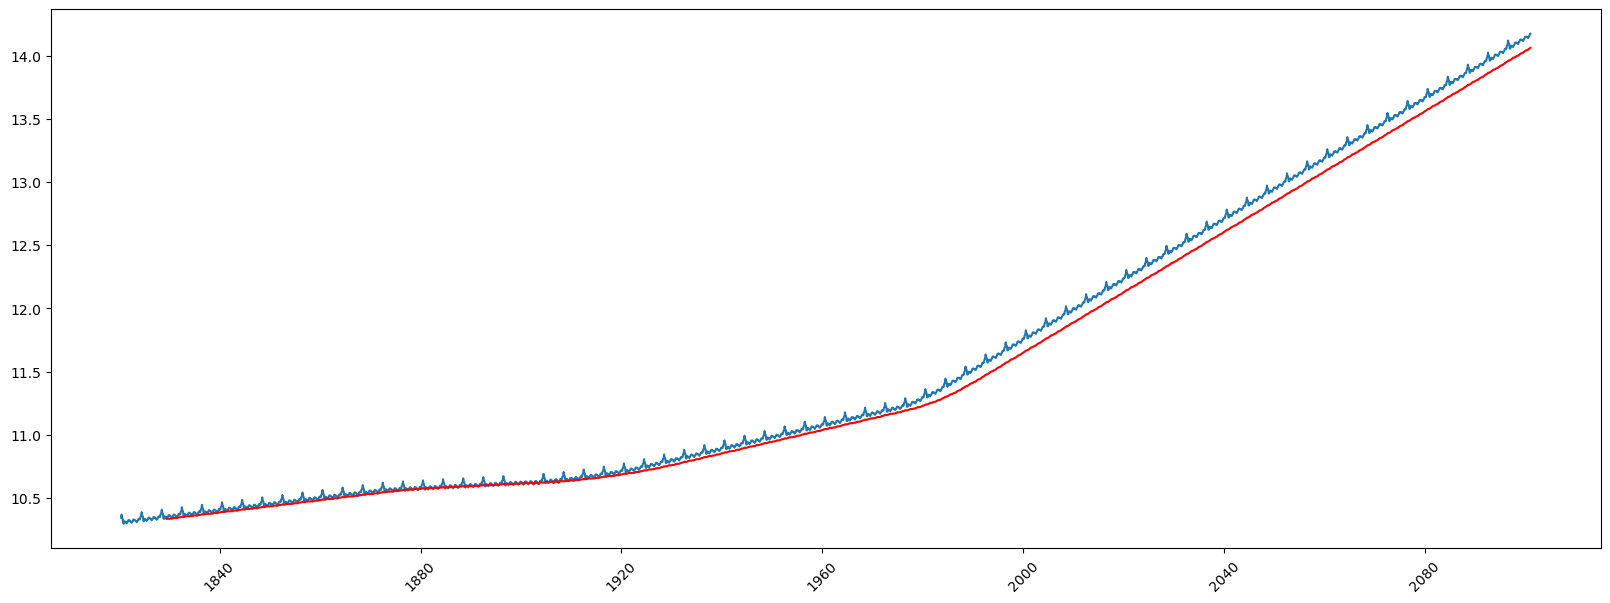

In [8]:
plt.rcParams['figure.figsize'] = [20, 7]
plt.plot(seoul_x,prophet_month12_ma[:])
plt.plot(seoul_x,prophet_year10_ma[:], color='red')
plt.xticks(rotation=45)

### 실제 데이터 + Prophet 예측 

In [9]:
seoul_month = all_df.loc[all_df.loc[:,"city_num"] == 0]
seoul_month["DateTime"] = seoul_month["year"].astype('str') + '-' + seoul_month["month"].astype('str')
seoul_month["DateTime"] = pd.to_datetime(seoul_month["DateTime"])
display(seoul_month)

month12_ma = seoul_month["Monthly Anamoly"].rolling(window=12).mean()
year10_ma = seoul_month["Monthly Anamoly"].rolling(window=120).mean()

,year,month,Monthly Anamoly,Monthly Unc.,city_num,DateTime
0,1819,7,23.127,1.964,0,1819-07-01
1,1819,8,NaN,NaN,0,1819-08-01
2,1819,9,20.360,1.764,0,1819-09-01
3,1819,10,12.881,2.030,0,1819-10-01
4,1819,11,4.459,2.194,0,1819-11-01
...,...,...,...,...,...,...
2413,2020,8,25.660,0.312,0,2020-08-01
2414,2020,9,20.951,0.347,0,2020-09-01
2415,2020,10,13.876,0.280,0,2020-10-01
2416,2020,11,7.990,0.518,0,2020-11-01


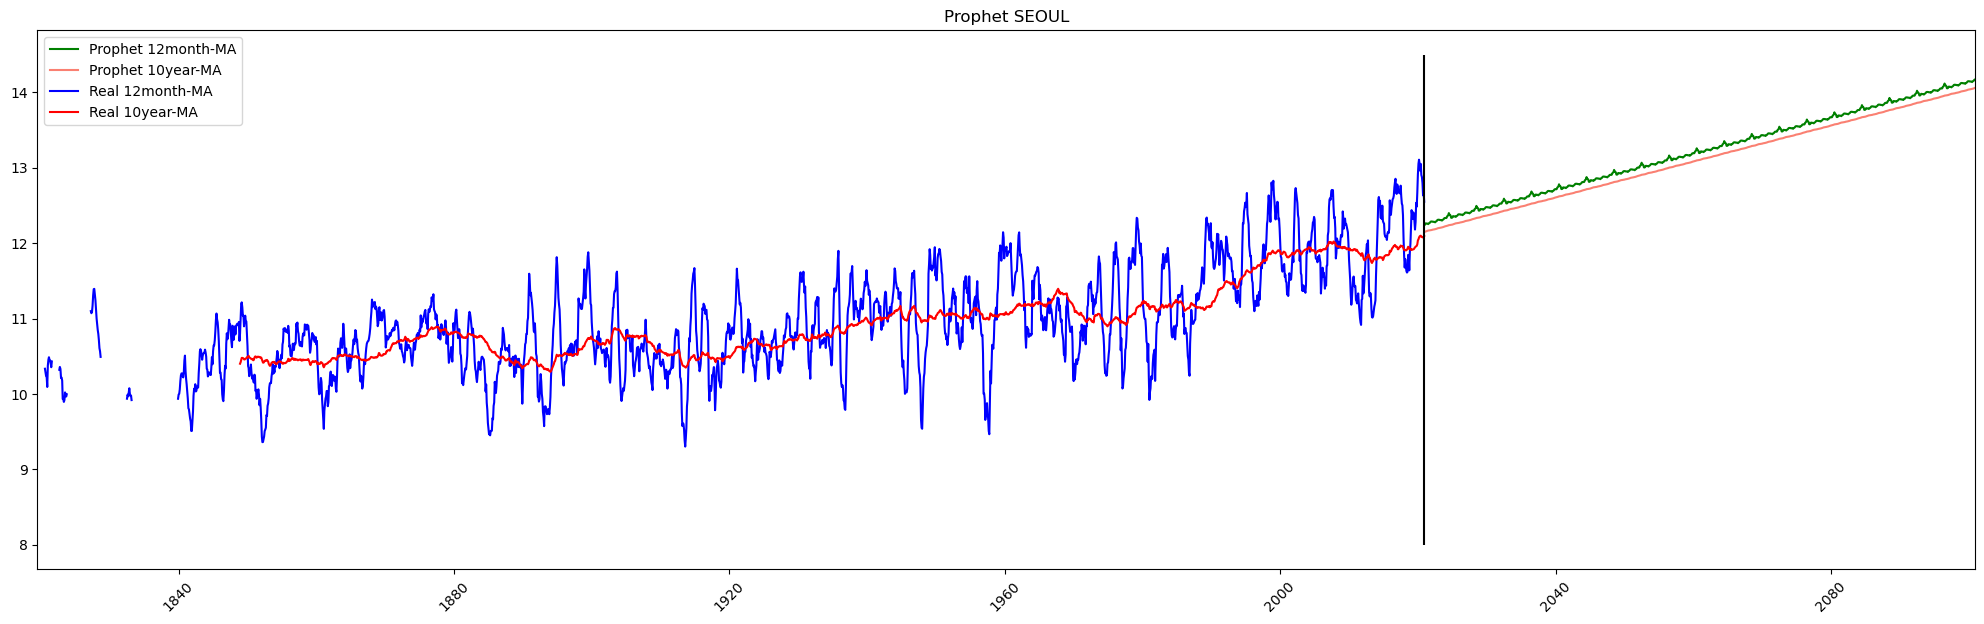

In [10]:
plt.rcParams['figure.figsize'] = [25, 7]
plt.plot(seoul_x,[None for i in range(2418)]+prophet_month12_ma[2418:].to_list(), label='Prophet 12month-MA', color='green')
plt.plot(seoul_x,[None for i in range(2418)]+prophet_year10_ma[2418:].to_list(), label='Prophet 10year-MA', color='salmon')
plt.plot(seoul_x,month12_ma.to_list() + [None for i in range(960)], color = 'blue', label='Real 12month-MA')
plt.plot(seoul_x, year10_ma.to_list() + [None for i in range(960)], color='red', label='Real 10year-MA')

plt.vlines(pd.to_datetime('2020-12'), ymin=8, ymax=14.5, color='black')
plt.xticks(rotation=45)
plt.xlim([pd.to_datetime('1819-07'), pd.to_datetime('2100-12')])
plt.title("Prophet SEOUL")
plt.legend()

## SHANGHAI

In [11]:
prophet_shanghai_df = pd.read_csv("./data/prophet_forecast/prophet_forecast_shanghai.csv")[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
prophet_shanghai_df["ds"] = pd.to_datetime(prophet_shanghai_df["ds"]).dt.to_period('M')
display(prophet_shanghai_df)
print(prophet_shanghai_df.dtypes)

,ds,yhat,yhat_lower,yhat_upper
0,1819-07,27.599116,25.633225,29.753780
1,1819-08,27.197779,25.311189,29.320848
2,1819-09,22.905969,20.971253,25.012062
3,1819-10,17.081195,15.112926,18.965075
4,1819-11,10.927609,9.000395,13.004135
...,...,...,...,...
3373,2100-08,32.744618,29.897856,35.444873
3374,2100-09,28.216576,25.331998,30.883823
3375,2100-10,22.530328,19.596502,25.212240
3376,2100-11,16.810727,14.349409,19.620377


ds            period[M]
yhat            float64
yhat_lower      float64
yhat_upper      float64
dtype: object


### 12month & 10year Moving Average

In [12]:
prophet_month12_ma = prophet_shanghai_df["yhat"].rolling(window=12).mean()
prophet_year10_ma = prophet_shanghai_df["yhat"].rolling(window=120).mean()

In [13]:
shanghai_x = pd.to_datetime(prophet_shanghai_df.loc[:,"ds"].dt.year.astype('str')+'-'+prophet_shanghai_df.loc[:,"ds"].dt.month.astype('str'))

(array([-62091., -47482., -32872., -18263.,  -3653.,  10957.,  25567.,
         40177.,  54786.]),
 [Text(-62091.0, 0, '1800'),
  Text(-47482.0, 0, '1840'),
  Text(-32872.0, 0, '1880'),
  Text(-18263.0, 0, '1920'),
  Text(-3653.0, 0, '1960'),
  Text(10957.0, 0, '2000'),
  Text(25567.0, 0, '2040'),
  Text(40177.0, 0, '2080'),
  Text(54786.0, 0, '2120')])

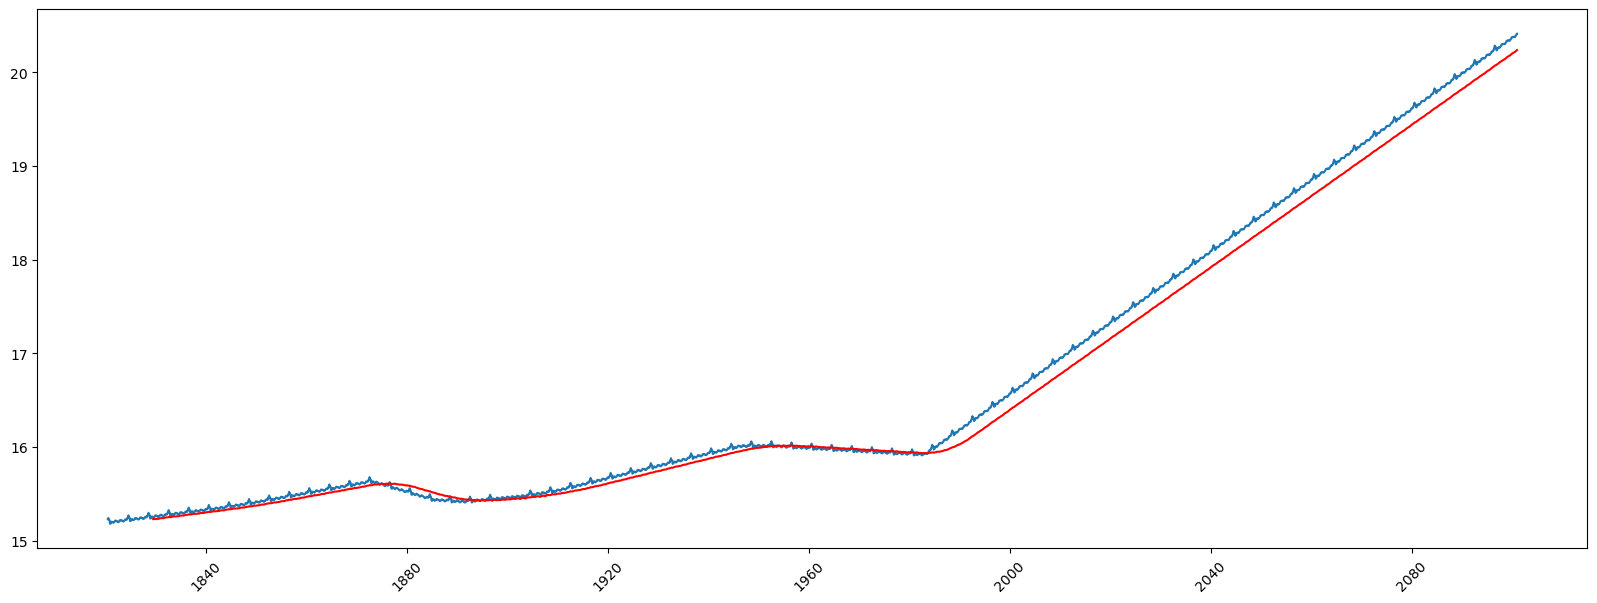

In [14]:
plt.rcParams['figure.figsize'] = [20, 7]
plt.plot(shanghai_x,prophet_month12_ma[:])
plt.plot(shanghai_x,prophet_year10_ma[:], color='red')
plt.xticks(rotation=45)

### 실제 데이터 + Prophet 예측 

In [15]:
shanghai_month = all_df.loc[all_df.loc[:,"city_num"] == 1]
shanghai_month["DateTime"] = shanghai_month["year"].astype('str') + '-' + shanghai_month["month"].astype('str')
shanghai_month["DateTime"] = pd.to_datetime(shanghai_month["DateTime"])
display(shanghai_month)

month12_ma = shanghai_month["Monthly Anamoly"].rolling(window=12).mean()
year10_ma = shanghai_month["Monthly Anamoly"].rolling(window=120).mean()

,year,month,Monthly Anamoly,Monthly Unc.,city_num,DateTime
2418,1819,7,27.191,1.919,1,1819-07-01
2419,1819,8,NaN,NaN,1,1819-08-01
2420,1819,9,23.599,1.779,1,1819-09-01
2421,1819,10,17.048,1.961,1,1819-10-01
2422,1819,11,10.205,2.007,1,1819-11-01
...,...,...,...,...,...,...
4831,2020,8,30.436,0.196,1,2020-08-01
4832,2020,9,24.199,0.211,1,2020-09-01
4833,2020,10,18.380,0.387,1,2020-10-01
4834,2020,11,14.438,0.533,1,2020-11-01


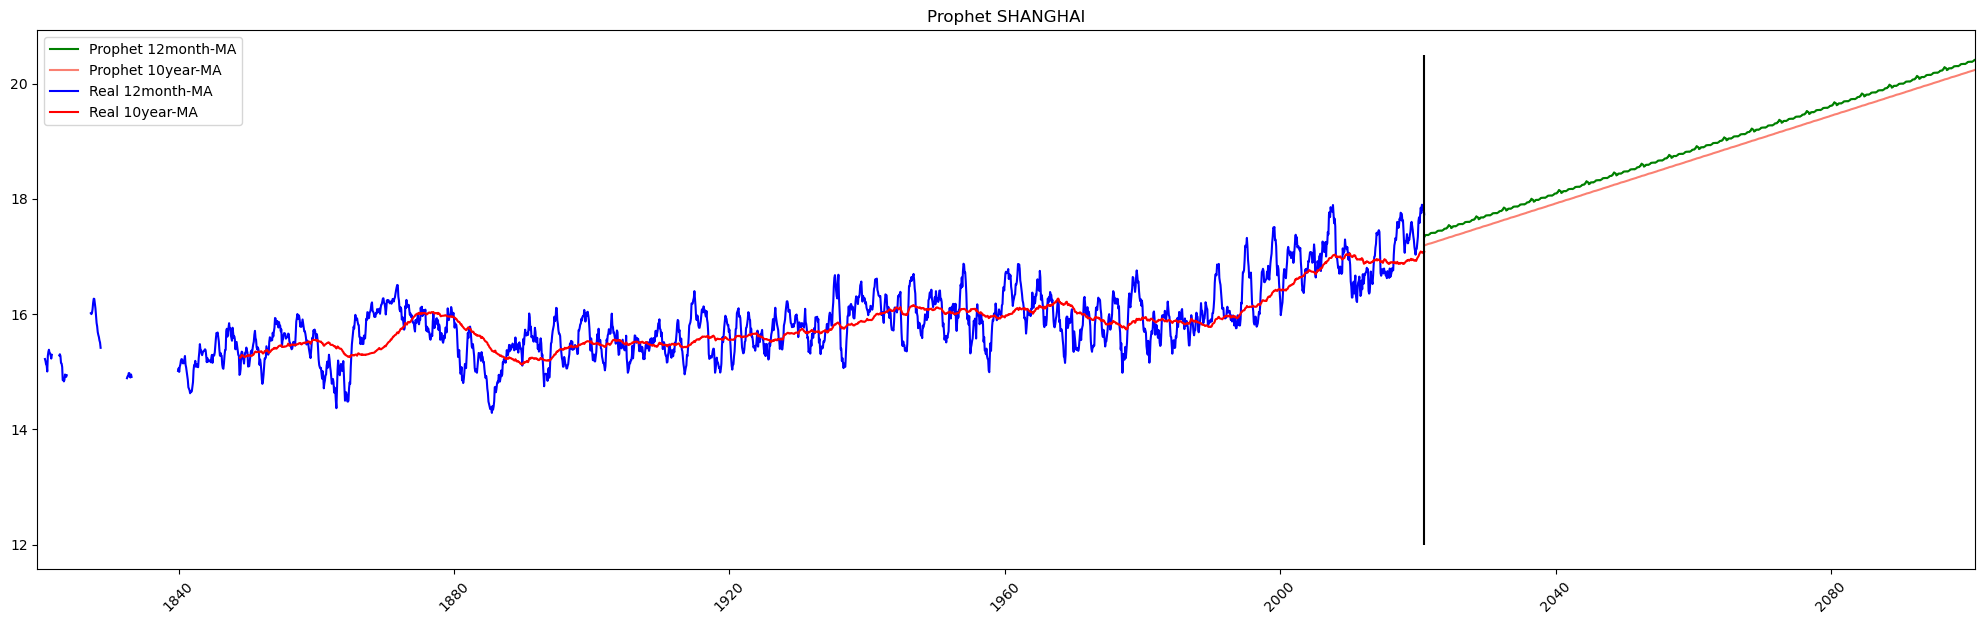

In [16]:
plt.rcParams['figure.figsize'] = [25, 7]
plt.plot(shanghai_x,[None for i in range(2418)]+prophet_month12_ma[2418:].to_list(), label='Prophet 12month-MA', color='green')
plt.plot(shanghai_x,[None for i in range(2418)]+prophet_year10_ma[2418:].to_list(), label='Prophet 10year-MA', color='salmon')
plt.plot(shanghai_x,month12_ma.to_list() + [None for i in range(960)], color = 'blue', label='Real 12month-MA')
plt.plot(shanghai_x, year10_ma.to_list() + [None for i in range(960)], color='red', label='Real 10year-MA')

plt.vlines(pd.to_datetime('2020-12'), ymin=12, ymax=20.5, color='black')
plt.xticks(rotation=45)
plt.xlim([pd.to_datetime('1819-07'), pd.to_datetime('2100-12')])
plt.title("Prophet SHANGHAI")
plt.legend()

## TOKYO

In [17]:
prophet_tokyo_df = pd.read_csv("./data/prophet_forecast/prophet_forecast_tokyo.csv")[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
prophet_tokyo_df["ds"] = pd.to_datetime(prophet_tokyo_df["ds"]).dt.to_period('M')
display(prophet_tokyo_df)
print(prophet_tokyo_df.dtypes)

,ds,yhat,yhat_lower,yhat_upper
0,1819-07,22.983820,20.894465,24.792839
1,1819-08,23.896769,21.916320,25.875467
2,1819-09,19.742148,17.767214,21.655915
3,1819-10,13.351895,11.571124,15.334490
4,1819-11,7.648239,5.864507,9.448624
...,...,...,...,...
3373,2100-08,28.360222,26.280270,30.405037
3374,2100-09,24.202633,22.106776,26.318462
3375,2100-10,17.861608,15.759227,20.094950
3376,2100-11,12.364791,10.270822,14.510350


ds            period[M]
yhat            float64
yhat_lower      float64
yhat_upper      float64
dtype: object


### 12month & 10year Moving Average

In [18]:
prophet_month12_ma = prophet_tokyo_df["yhat"].rolling(window=12).mean()
prophet_year10_ma = prophet_tokyo_df["yhat"].rolling(window=120).mean()

In [19]:
tokyo_x = pd.to_datetime(prophet_tokyo_df.loc[:,"ds"].dt.year.astype('str')+'-'+prophet_tokyo_df.loc[:,"ds"].dt.month.astype('str'))

(array([-62091., -47482., -32872., -18263.,  -3653.,  10957.,  25567.,
         40177.,  54786.]),
 [Text(-62091.0, 0, '1800'),
  Text(-47482.0, 0, '1840'),
  Text(-32872.0, 0, '1880'),
  Text(-18263.0, 0, '1920'),
  Text(-3653.0, 0, '1960'),
  Text(10957.0, 0, '2000'),
  Text(25567.0, 0, '2040'),
  Text(40177.0, 0, '2080'),
  Text(54786.0, 0, '2120')])

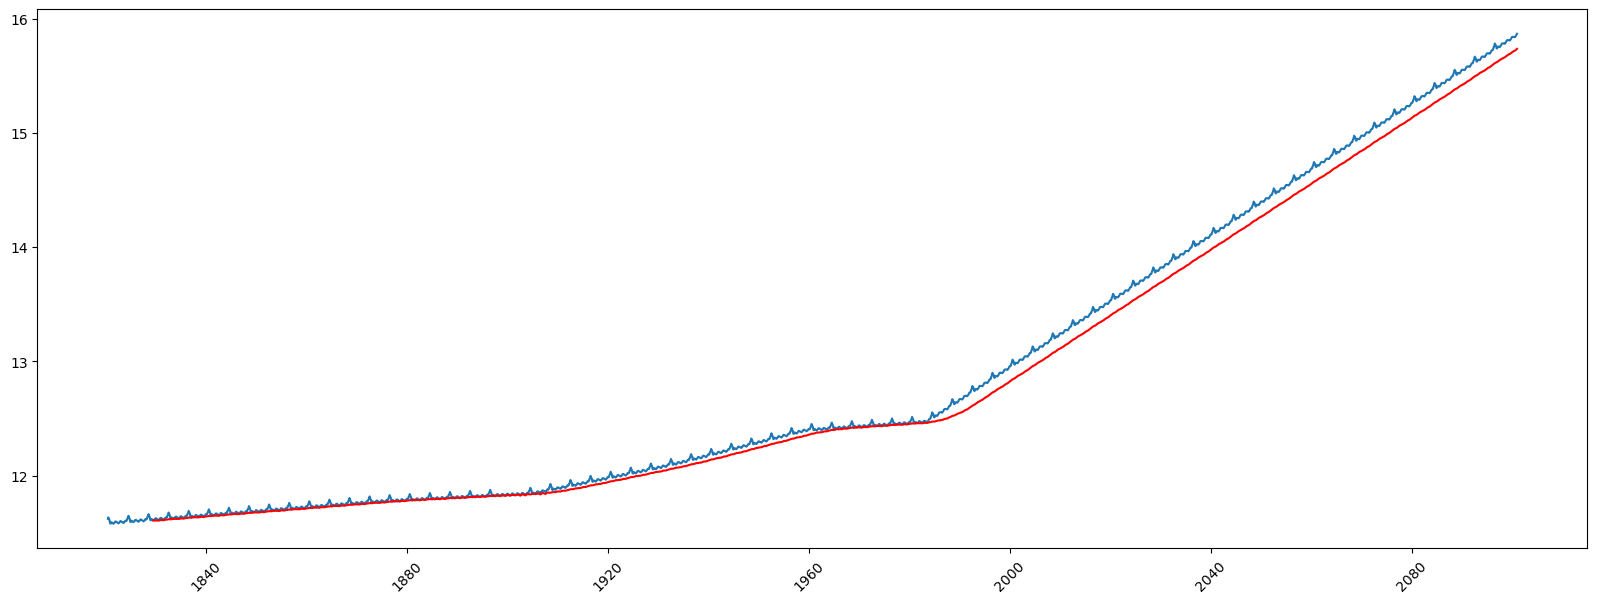

In [20]:
plt.rcParams['figure.figsize'] = [20, 7]
plt.plot(tokyo_x,prophet_month12_ma[:])
plt.plot(tokyo_x,prophet_year10_ma[:], color='red')
plt.xticks(rotation=45)

### 실제 데이터 + Prophet 예측 

In [21]:
tokyo_month = all_df.loc[all_df.loc[:,"city_num"] == 2]
tokyo_month["DateTime"] = tokyo_month["year"].astype('str') + '-' + tokyo_month["month"].astype('str')
tokyo_month["DateTime"] = pd.to_datetime(tokyo_month["DateTime"])
display(tokyo_month)

month12_ma = tokyo_month["Monthly Anamoly"].rolling(window=12).mean()
year10_ma = tokyo_month["Monthly Anamoly"].rolling(window=120).mean()

,year,month,Monthly Anamoly,Monthly Unc.,city_num,DateTime
4836,1819,7,22.664,2.002,2,1819-07-01
4837,1819,8,NaN,NaN,2,1819-08-01
4838,1819,9,20.356,1.856,2,1819-09-01
4839,1819,10,13.372,1.919,2,1819-10-01
4840,1819,11,6.752,1.990,2,1819-11-01
...,...,...,...,...,...,...
7249,2020,8,27.166,0.388,2,2020-08-01
7250,2020,9,22.270,0.199,2,2020-09-01
7251,2020,10,14.491,0.139,2,2020-10-01
7252,2020,11,10.471,0.169,2,2020-11-01


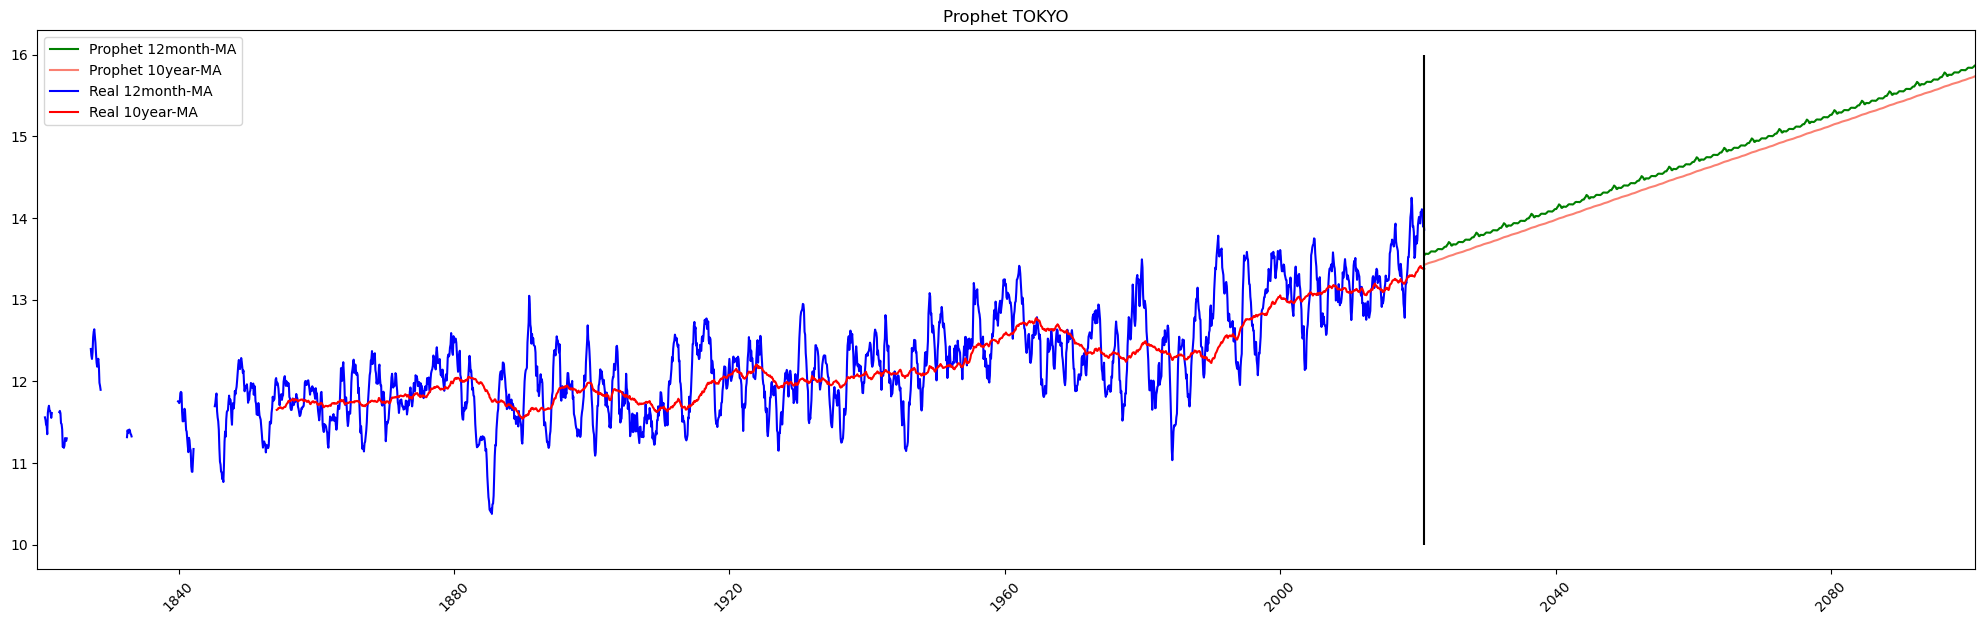

In [22]:
plt.rcParams['figure.figsize'] = [25, 7]
plt.plot(tokyo_x,[None for i in range(2418)]+prophet_month12_ma[2418:].to_list(), label='Prophet 12month-MA', color='green')
plt.plot(tokyo_x,[None for i in range(2418)]+prophet_year10_ma[2418:].to_list(), label='Prophet 10year-MA', color='salmon')
plt.plot(tokyo_x,month12_ma.to_list() + [None for i in range(960)], color = 'blue', label='Real 12month-MA')
plt.plot(tokyo_x, year10_ma.to_list() + [None for i in range(960)], color='red', label='Real 10year-MA')

plt.vlines(pd.to_datetime('2020-12'), ymin=10, ymax=16, color='black')
plt.xticks(rotation=45)
plt.xlim([pd.to_datetime('1819-07'), pd.to_datetime('2100-12')])
plt.title("Prophet TOKYO")
plt.legend()